In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('homeprices_banglore.csv')
sx = MinMaxScaler()
sy = MinMaxScaler()
X_scaled = sx.fit_transform(df[['area','bedrooms']])
# y_scaled = sy.fit_transform(df[['price']])
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [21]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_feature = X.shape[1]
    w = np.ones(shape=(number_of_feature))
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, X.T) + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        print(f'{y_pred},   y{y_true}')

        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)

[0.33827586 1.37068966 0.72068966 0.74862069 0.38793103 0.37758621
 1.4162069  1.61206897 0.67586207 2.         0.84482759 1.43448276
 0.31896552 0.35344828 1.         0.37931034 0.63103448 0.75517241
 1.17931034 0.        ],   y[0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]
[ 0.3268907   1.35414392  0.70732451  0.73513023  0.37632308  0.36602466
  1.39945693  1.5944402   0.66269806  1.9803665   0.83090546  1.4176508
  0.307667    0.34199504  0.98538164  0.36774107  0.61807161  0.74165255
  1.16388745 -0.00960322],   y[0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]
[ 0.31582745  1.33805101  0.6943318   0.72201531  0.36504258  0.35478943
  1.38316488  

In [77]:
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

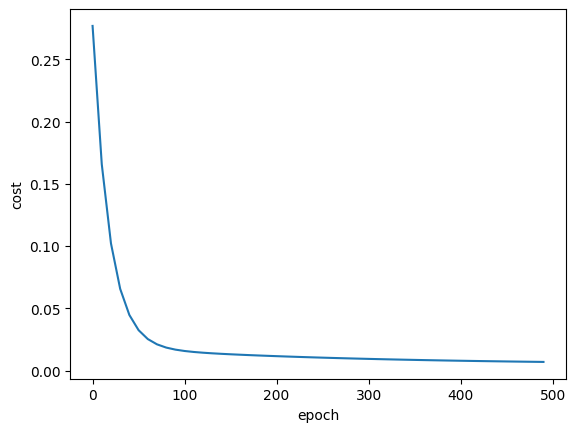

In [78]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [79]:
def predict(area, bedroom, w, b):
    X_scaled = sx.transform([[area, bedroom]])[0]

    scaled_price = w[0]*X_scaled[0] + w[1]*X_scaled[1] + b
    return sy.inverse_transform([[scaled_price]])

predict(2600, 4, w, b)

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [19]:
# Stochastic Gradient Descent
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_feature = X.shape[1]
    total_sample = X.shape[0]
    w = np.ones(shape=(number_of_feature))
    b = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_sample-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_sample)*np.sum(sample_y-y_pred)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_pred-sample_y))

        if i%100 == 0:
            epoch_list.append(i)
            cost_list.append(cost)

    return w, b, cost, cost_list, epoch_list

In [20]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


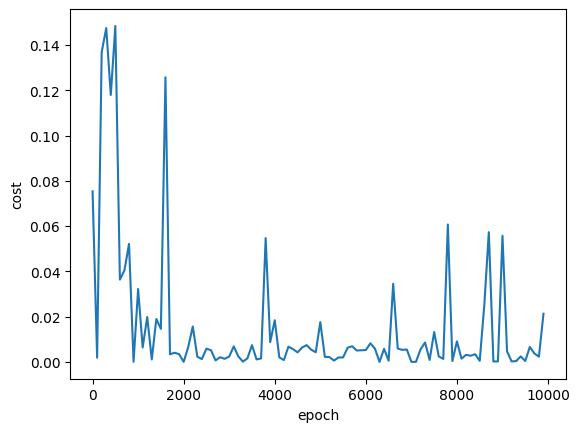

In [115]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [116]:
w_sgd, b_sgd, cost_sgd

(array([0.70261111, 0.67216812]),
 np.float64(-0.22977903606935152),
 np.float64(0.0004759168141656504))

In [13]:
# def mini_batch_gradient(X, y, epochs, learning_rate=0.01):
#     total_sample = X_scaled.shape[0]
#     number_of_feature = X_scaled.shape[1]
#     w = np.ones(shape=(number_of_feature,))
#     b = 0

#     cost_list = []
#     epoch_list = []
    
#     for i in range(epochs):
#         indices = np.random.choice(range(0,total_sample), size=10)
#         batch_x = X_scaled[indices]
#         batch_y = y_scaled[indices]
#         y_pred = np.dot(w, batch_x.T) + b

#         cost = np.mean(np.square(y_pred-batch_y))

#         batch_size = 10
        
#         w_der = -(2/batch_size)*(batch_x.T.dot(batch_y-y_pred))
#         b_der = -(2/batch_size)*np.sum(batch_y-y_pred)

#         w = w - learning_rate*w_der
#         b = b - b_der*learning_rate

#         if i/20 == 0:
#             cost_list.append(cost)
#             epoch_list.append(i)

#         return w, b, cost, cost_list, epoch_list


def mini_batch_gradient(X, y, epochs, batch_size = 5, learning_rate=0.01):
    total_sample = X.shape[0]
    number_of_feature = X.shape[1]
    w = np.ones(shape=(number_of_feature,))
    b = 0
    if batch_size > total_sample:
        batch_size = total_sample

    num_batch = int(total_sample / batch_size)

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_sample)
        X_tmp = X[random_indices]
        y_tmp = y[random_indices]
        
        for j in range(0, total_sample, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            y_pred = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj - y_pred))
            b_grad = -(2/len(Xj))*np.sum(yj - y_pred)

            w = w - w_grad*learning_rate
            b = b - b_grad*learning_rate

            cost = np.mean(np.square(yj-y_pred))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [16]:
w_mbg, b_mbg, cost_mbg, cost_list_mbg, epoch_list_mbg = mini_batch_gradient(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)

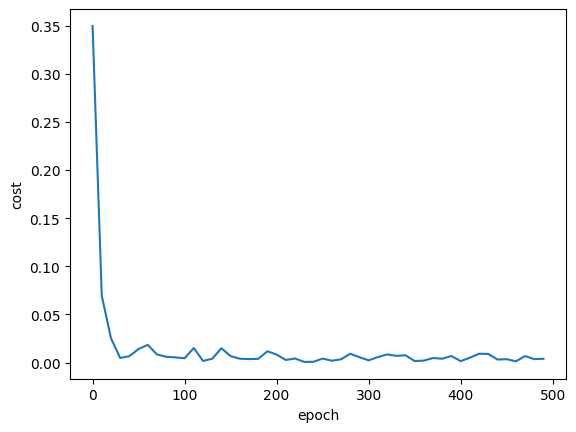

In [17]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mbg, cost_list_mbg)

In [10]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])